# Cluster SO/DO Extrema for Line 80

In [1]:
# imports
from importlib import reload

import numpy as np
from scipy.interpolate import interp1d

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils

# defs

In [2]:
def show_metrics(ds, grid_extrem, ds_in_tcluster, in_cluster):
    #
    fig = plt.figure(figsize=(12,12))
    plt.clf()

    gs = gridspec.GridSpec(2,3)

    for ss, metric in enumerate(['SO', 'doxy', 'N', 'T', 'chla', 'lon']):
        ax = plt.subplot(gs[ss])

        if metric == 'T':
            ds_metric = 'temperature'
        elif metric == 'chla':
            ds_metric = 'chlorophyll_a'
        else:
            ds_metric = metric

        # Plot all
        srt = np.argsort(ds.time[ds_in_tcluster].values)
        plt_depth = 0
        if metric in ['lon']:
            ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][ds_in_tcluster][srt], 'k-')
        else:
            ax.plot(ds.time[ds_in_tcluster][srt], ds[ds_metric][plt_depth,ds_in_tcluster][srt], 'k-')

        for depth, clr in zip(np.arange(3), ['b', 'g', 'r']):
            at_d = grid_extrem.depth[in_cluster] == depth
            ax.scatter(grid_extrem.time[in_cluster][at_d], grid_extrem[metric][in_cluster][at_d], color=clr)

        ax.set_ylabel(metric)

        plot_utils.set_fontsize(ax, 13.)

    plt.show()

# Load up

In [3]:
line = '80'

# Load
items = cugn_io.load_line(line)
grid_tbl = items['grid_tbl']
ds = items['ds']

# Fill
grid_utils.fill_in_grid(grid_tbl, ds)

In [4]:
perc = 80.
grid_outliers, _, _ = grid_utils.gen_outliers(line, perc)

In [5]:
extrem = grid_outliers.SO > 1.1
grid_extrem = grid_outliers[extrem].copy()
grid_extrem.head()

,depth,profile,row,col,doxy,doxy_p,time,lon,lat,z,CT,SA,sigma0,SO,N,chla,T
0,0,35283,17,22,303.806249,99.852725,2017-03-14 17:36:42,-119.765187,34.310300,10,13.859467,33.517936,24.959127,1.184411,4.176267,0.685277,13.833200
1,0,35284,17,24,303.781988,99.827288,2017-03-14 18:24:03,-119.769913,34.305825,10,13.308193,33.517958,25.070740,1.171203,7.284064,0.950556,13.283111
2,0,35285,17,24,299.818510,99.654577,2017-03-14 19:10:20,-119.775222,34.300695,10,13.229408,33.523889,25.090991,1.154125,7.315130,1.092245,13.204625
8,0,35291,17,23,284.714497,99.658703,2017-03-15 04:11:56,-119.838118,34.246660,10,13.584605,33.503367,25.003991,1.103732,4.644403,0.328526,13.558600
16,0,35299,17,23,284.032391,99.488055,2017-03-15 23:39:29,-120.036955,34.289887,10,13.621933,33.518739,25.008182,1.102043,6.164694,0.653648,13.596200


# Cluster

In [6]:
clusters.generate_clusters(grid_extrem)

Found 29 unique clusters


In [7]:
cluster_stats = clusters.cluster_stats(grid_extrem)

# Plot a few

In [8]:
uni_cidx, cnt_cidx = np.unique(grid_extrem.cluster, return_counts=True)

In [9]:
uni_cidx[0:3], cnt_cidx

(array([-1,  0,  1]),
 array([101,   5,   5,   9,   7,   6,  11,  23,  10,  15,   7,  15,   5,
         36,  14,  21,  59,  52,  18,  13,   8,   6,  10,  21,  18,  22,
          8,   9,   5]))

## SO

In [28]:
cidx = 0 # short event [Feb 2017]
cidx = 1 # short on-shore, weak [June 2017]
cidx = 2 # another short on-shore, weak [June 2017]
cidx = 3 # short at-shore; spike in Chla [August 2017]
cidx = 4 # brief, sub-surface [May 2018]
cidx = 5 # brief, on-shore [Aug 2018] -- good one to show
cidx = 6 # off-shore? [late Aug 2018]
cidx = 7 # brief, uninteresting [June 2019]
cidx = 8 # on-shore, high N [late June 2019]
cidx = 9 # intense spike [late August 2019]
cidx = 10 # off-shore, high DO, modest N [late October 2019]
cidx = 11 # spike of DO, Chla and a bit of T and N [Late Feb 2020]
cidx = 12 # High DO, high N [May 2020] -- worth showing
cidx = 13 # spike in DO, chla, higher N [early June 2020] 
cidx = 14 # spike in DO, chla, uninteresting N [August 2020] -- worth showing 
cidx = 15 # parked for awhile.. [August 2020] 
cidx = 16 # impressive; also parked for awhile.. [July 2021] 
cidx = 17 # impressive; also parked for awhile.. [July 2021] 
cidx = 18 # spike in DO, dip in T, elevated chla; uninteresting N [mid-Aug 2021]
cidx = 19 # off-shore, pretty uninteresting.. [late Sep 2021]
cidx = 20 # DO spike, T dip [late Oct 2021]
cidx = 21 # brief event, higher N, high Chla [late Oct 2021]
cidx = 22 # DO spike, Chla too, modest N [mid-Feb 2022] -- worth showing
cidx = 23 # Stationary spike [late March 2022]
cidx = 24 # Large spike in DO, Chla [late June 2022] -- worth showing
cidx = 25 # brief event [late July 2020]
cidx = 26 # DO, N, Chla spike, T dip! [mid Sept 2022] -- worth showing
cidx = 27 # Part of the cidx=26 episode

#cidx = 5 # brief, on-shore [Aug 2018] -- good one to show
#cidx = 12 # High DO, high N [May 2020] -- COVID worth showing
#cidx = 14 # spike in DO, chla, uninteresting N [August 2020] -- worth showing 
cidx = 22 # DO spike, Chla too, modest N [mid-Feb 2022] -- worth showing
#cidx = 24 # Large spike in DO, Chla [late June 2022] -- worth showing
#cidx = 26 # DO, N, Chla spike, T dip! [mid Sept 2022] -- worth showing

in_cluster = grid_extrem.cluster == cidx

tmin = grid_extrem.time[in_cluster].min() - pandas.Timedelta('2W')
tmax = grid_extrem.time[in_cluster].max() + pandas.Timedelta('2W')
tmin, tmax

(Timestamp('2022-01-29 06:56:39'), Timestamp('2022-03-05 03:01:29'))

In [29]:
ds_in_tcluster = (ds.time >= tmin) & (ds.time <= tmax)
np.sum(ds_in_tcluster.values)

332

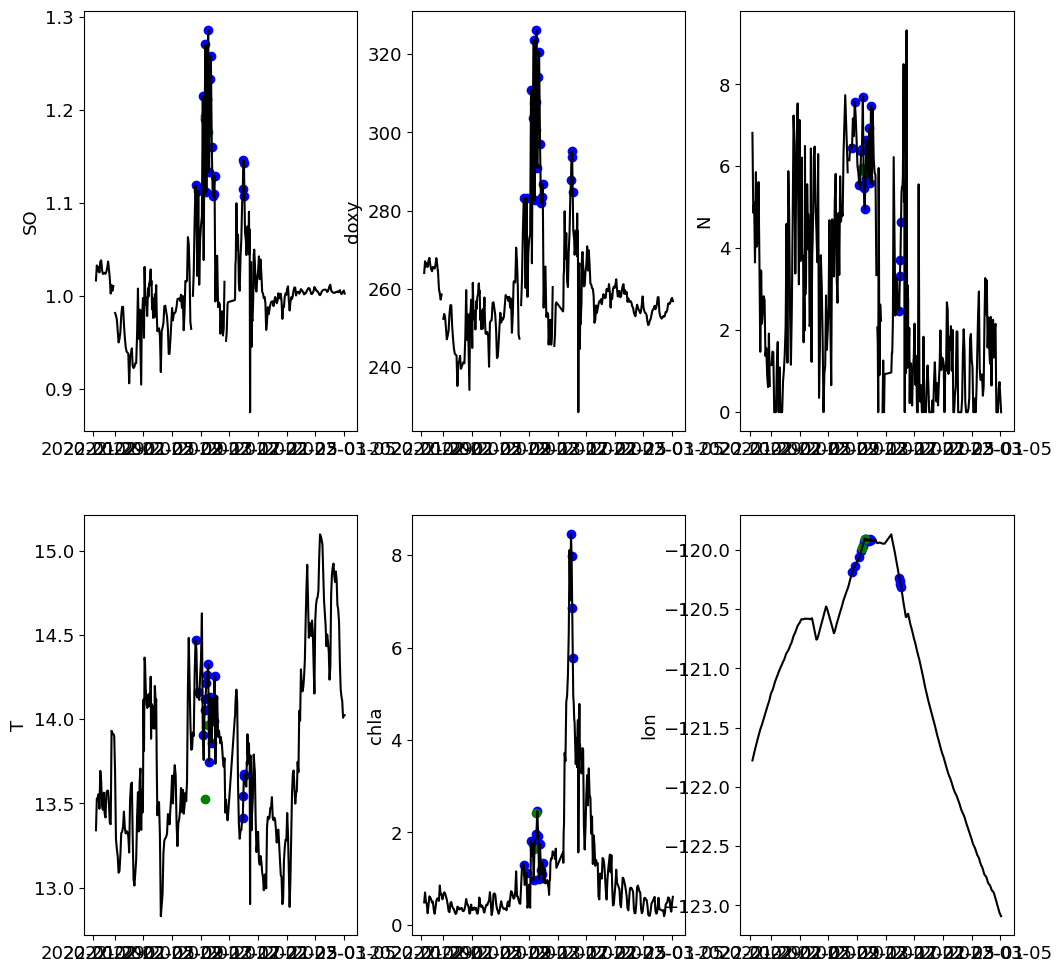

In [30]:
show_metrics(ds, grid_extrem, ds_in_tcluster, in_cluster)